In [138]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

In [144]:
pip install baseline

In [149]:
from scipy.signal import savgol_filter
from baseline import Baseline

In [150]:
def analiza(data, muestra):
    print("Holi estás en analiza")
    
    #Nos quedamos con la sección de huellas dactilares
    
    result = data.dtypes

    print("Output:")
    print(result)
    
    data.drop(data[data['No. onda'] >= 2000].index, inplace = True)
    print(data)
    
    #Graficamos huellas dactilares
    plt.plot(data['No. onda'], data['Absorbancia'])
    plt.gca().invert_xaxis()
    plt.figure(figsize=(25,15))

    plt.show()
    
    #Derivamos por primera vez
    print("~PRIMER DERIVADA~")
    dev1=derivative(data['No. onda'],data['Absorbancia'])
    #print(dev1)
    
    #Pasamos dev1 de list a dataframe
    data['Primer derivada']= dev1
    print(data)
    
    #Derivamos por segunda vez
    print("~SEGUNDA DERIVADA~")
    dev2=derivative(data['No. onda'],data['Primer derivada'])
    #print(dev2)
    
    #Pasamos dev2 de list a dataframe
    data['Segunda derivada']= dev2
    print(data)
    
    #Sacamos n3, n2, n4
    #Encontramos los picos
    print('los valores más grandes que están en el pico n3', data.nlargest(3, 'Absorbancia')) #<---Saca los valores más grandes que están en el pico n3
    
    
    peaks2, _ = find_peaks(data['Absorbancia'], prominence=0.052)      # BEST!
    
    print('Picos usando peaks: ',peaks2)
    print('No de onda:\n',data.iloc[peaks2])

    
    bl=baseline(data['Absorbancia'], deg=4)
    plt.plot(data['No. onda'], bl)
    plt.title('title name')
    plt.xlabel('x_axis name')
    plt.ylabel('y_axis name')
    plt.show()
    #if muestra==true:
        #print("Es muestra")

In [69]:
def derivative(x,y):
    print("Hello from derivative")
    print(x.iloc[0])
    
    print(len(x)-1)
    derivative=[]
    
    for i in range(len(x)):
        if i==0 or i==len(x)-1:
            derivative.append(0);
        else:
            d=-0.5*(((y.iloc[i+1]-y.iloc[i])/(x.iloc[i+1]-x.iloc[i]))+((y.iloc[i]-y.iloc[i-1])/(x.iloc[i]-x.iloc[i-1])))
            derivative.append(d);
    
    #Graficamos
    plt.plot(x, derivative)
    plt.gca().invert_xaxis()
    plt.figure(figsize=(25,15))
    plt.show()
    
    return derivative

Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00961
970   1996.96986      0.00878
971   1994.90900      0.00811
972   1992.84815      0.00838
973   1990.78729      0.00896
...          ...          ...
1741   408.04957      0.03319
1742   405.98871      0.03363
1743   403.92786      0.03396
1744   401.86700      0.03501
1745   399.80614      0.03662

[777 rows x 2 columns]


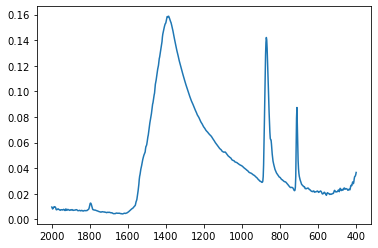

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


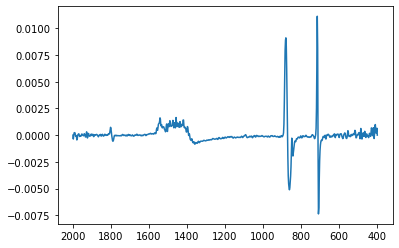

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00961         0.000000
970   1996.96986      0.00878        -0.000364
971   1994.90900      0.00811        -0.000097
972   1992.84815      0.00838         0.000206
973   1990.78729      0.00896         0.000235
...          ...          ...              ...
1741   408.04957      0.03319         0.000507
1742   405.98871      0.03363         0.000187
1743   403.92786      0.03396         0.000335
1744   401.86700      0.03501         0.000645
1745   399.80614      0.03662         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


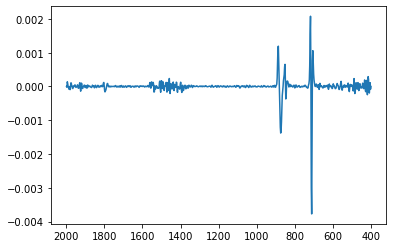

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00961         0.000000          0.000000
970   1996.96986      0.00878        -0.000364         -0.000024
971   1994.90900      0.00811        -0.000097          0.000138
972   1992.84815      0.00838         0.000206          0.000081
973   1990.78729      0.00896         0.000235          0.000004
...          ...          ...              ...               ...
1741   408.04957      0.03319         0.000507         -0.000194
1742   405.98871      0.03363         0.000187         -0.000042
1743   403.92786      0.03396         0.000335          0.000111
1744   401.86700      0.03501         0.000645         -0.000081
1745   399.80614      0.03662         0.000000          0.000000

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1267  1384.89551      0.15868        -0.000150         -0.000119
1266  1386.95636  

NameError: name 'baseline' is not defined

In [151]:
CaCO3_data=pd.read_table('Datos_Rotativo/CaCO3.0.txt',sep=',')
analiza(CaCO3_data, True)


Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00438
970   1996.96986      0.00436
971   1994.90900      0.00421
972   1992.84815      0.00414
973   1990.78729      0.00429
...          ...          ...
1741   408.04957      0.02742
1742   405.98871      0.02755
1743   403.92786      0.02735
1744   401.86700      0.02753
1745   399.80614      0.02752

[777 rows x 2 columns]


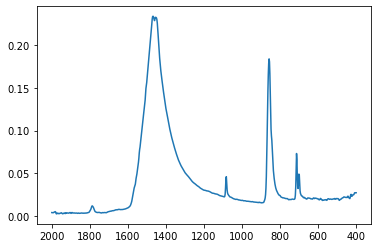

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


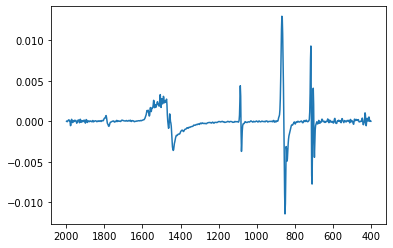

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00438         0.000000
970   1996.96986      0.00436        -0.000041
971   1994.90900      0.00421        -0.000053
972   1992.84815      0.00414         0.000019
973   1990.78729      0.00429         0.000073
...          ...          ...              ...
1741   408.04957      0.02742         0.000291
1742   405.98871      0.02755        -0.000017
1743   403.92786      0.02735        -0.000005
1744   401.86700      0.02753         0.000041
1745   399.80614      0.02752         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


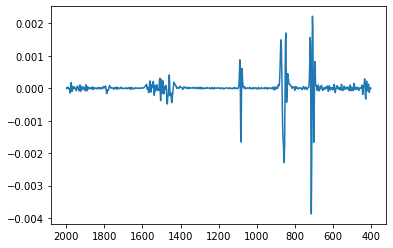

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00438         0.000000          0.000000
970   1996.96986      0.00436        -0.000041         -0.000013
971   1994.90900      0.00421        -0.000053          0.000015
972   1992.84815      0.00414         0.000019          0.000031
973   1990.78729      0.00429         0.000073          0.000031
...          ...          ...              ...               ...
1741   408.04957      0.02742         0.000291         -0.000132
1742   405.98871      0.02755        -0.000017         -0.000072
1743   403.92786      0.02735        -0.000005          0.000014
1744   401.86700      0.02753         0.000041          0.000001
1745   399.80614      0.02752         0.000000          0.000000

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1227  1467.32976      0.23341         0.000046         -0.000304
1228  1465.26891  

In [123]:
Concha_data=pd.read_table('Datos_Rotativo/Concha.0.txt',sep=',')
analiza(Concha_data, True)

Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00855
970   1996.96986      0.00792
971   1994.90900      0.00743
972   1992.84815      0.00788
973   1990.78729      0.00816
...          ...          ...
1741   408.04957      0.03991
1742   405.98871      0.04083
1743   403.92786      0.04174
1744   401.86700      0.04175
1745   399.80614      0.04060

[777 rows x 2 columns]


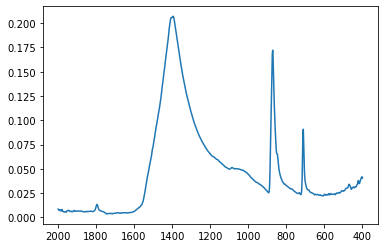

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


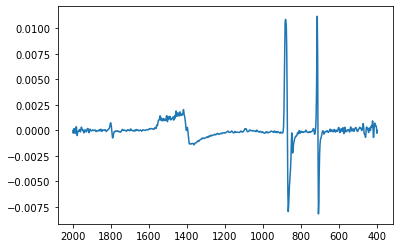

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00855         0.000000
970   1996.96986      0.00792        -0.000272
971   1994.90900      0.00743        -0.000010
972   1992.84815      0.00788         0.000177
973   1990.78729      0.00816        -0.000039
...          ...          ...              ...
1741   408.04957      0.03991         0.000446
1742   405.98871      0.04083         0.000444
1743   403.92786      0.04174         0.000223
1744   401.86700      0.04175        -0.000277
1745   399.80614      0.04060         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


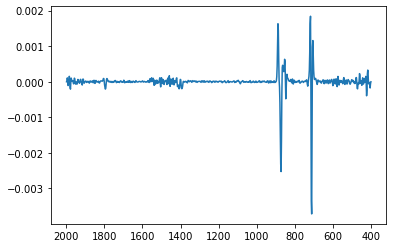

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00855         0.000000          0.000000
970   1996.96986      0.00792        -0.000272         -0.000002
971   1994.90900      0.00743        -0.000010          0.000109
972   1992.84815      0.00788         0.000177         -0.000007
973   1990.78729      0.00816        -0.000039         -0.000107
...          ...          ...              ...               ...
1741   408.04957      0.03991         0.000446         -0.000019
1742   405.98871      0.04083         0.000444         -0.000054
1743   403.92786      0.04174         0.000223         -0.000175
1744   401.86700      0.04175        -0.000277         -0.000054
1745   399.80614      0.04060         0.000000          0.000000

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1262  1395.19979      0.20718        -0.000034         -0.000179
1261  1397.26064  

In [124]:
data2_600_1=pd.read_table('Datos_Rotativo/2-600.1.txt',sep=',')
analiza(data2_600_1, False)

Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00672
970   1996.96986      0.00666
971   1994.90900      0.00620
972   1992.84815      0.00591
973   1990.78729      0.00579
...          ...          ...
1741   408.04957      0.07005
1742   405.98871      0.07011
1743   403.92786      0.06990
1744   401.86700      0.06945
1745   399.80614      0.06947

[777 rows x 2 columns]


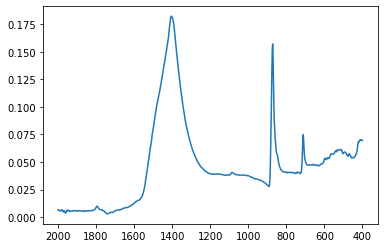

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


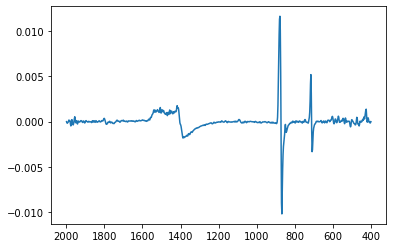

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00672         0.000000
970   1996.96986      0.00666        -0.000126
971   1994.90900      0.00620        -0.000182
972   1992.84815      0.00591        -0.000099
973   1990.78729      0.00579        -0.000070
...          ...          ...              ...
1741   408.04957      0.07005        -0.000039
1742   405.98871      0.07011        -0.000036
1743   403.92786      0.06990        -0.000160
1744   401.86700      0.06945        -0.000104
1745   399.80614      0.06947         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


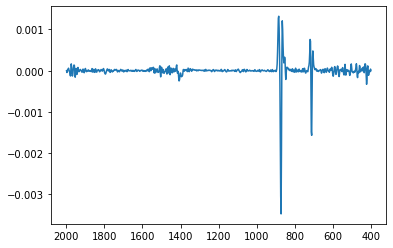

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00672         0.000000      0.000000e+00
970   1996.96986      0.00666        -0.000126     -4.414740e-05
971   1994.90900      0.00620        -0.000182      6.474954e-06
972   1992.84815      0.00591        -0.000099      2.707720e-05
973   1990.78729      0.00579        -0.000070      3.060897e-05
...          ...          ...              ...               ...
1741   408.04957      0.07005        -0.000039     -7.997508e-11
1742   405.98871      0.07011        -0.000036     -2.943175e-05
1743   403.92786      0.06990        -0.000160     -1.648175e-05
1744   401.86700      0.06945        -0.000104      3.884970e-05
1745   399.80614      0.06947         0.000000      0.000000e+00

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1257  1405.50407      0.18213         0.000255         -0.000222
1258  1403.44321  

In [126]:
data2_800_1=pd.read_table('Datos_Rotativo/2-800.1.txt',sep=',')
analiza(data2_800_1, False)

Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00525
970   1996.96986      0.00515
971   1994.90900      0.00497
972   1992.84815      0.00497
973   1990.78729      0.00530
...          ...          ...
1741   408.04957      0.06067
1742   405.98871      0.06164
1743   403.92786      0.06194
1744   401.86700      0.06183
1745   399.80614      0.06365

[777 rows x 2 columns]


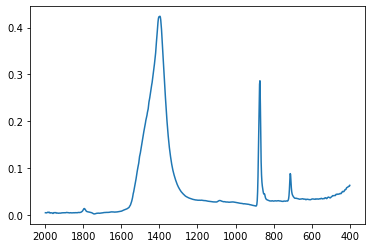

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


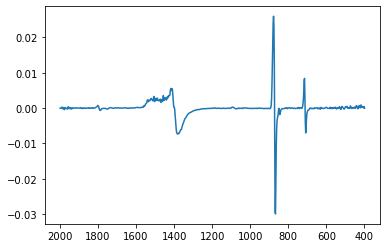

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00525         0.000000
970   1996.96986      0.00515        -0.000068
971   1994.90900      0.00497        -0.000044
972   1992.84815      0.00497         0.000080
973   1990.78729      0.00530         0.000233
...          ...          ...              ...
1741   408.04957      0.06067         0.000405
1742   405.98871      0.06164         0.000308
1743   403.92786      0.06194         0.000046
1744   401.86700      0.06183         0.000415
1745   399.80614      0.06365         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


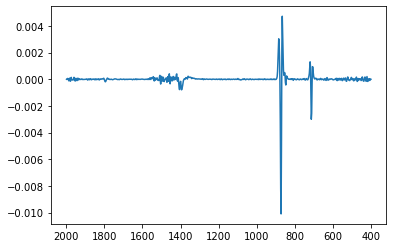

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00525         0.000000          0.000000
970   1996.96986      0.00515        -0.000068         -0.000011
971   1994.90900      0.00497        -0.000044          0.000036
972   1992.84815      0.00497         0.000080          0.000067
973   1990.78729      0.00530         0.000233          0.000047
...          ...          ...              ...               ...
1741   408.04957      0.06067         0.000405          0.000009
1742   405.98871      0.06164         0.000308         -0.000087
1743   403.92786      0.06194         0.000046          0.000026
1744   401.86700      0.06183         0.000415         -0.000011
1745   399.80614      0.06365         0.000000          0.000000

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1261  1397.26064      0.42419        -0.000354         -0.000506
1260  1399.32150  

In [127]:
data2_1000_1=pd.read_table('Datos_Rotativo/2-1000.1.txt',sep=',')
analiza(data2_1000_1, False)

Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00586
970   1996.96986      0.00590
971   1994.90900      0.00606
972   1992.84815      0.00614
973   1990.78729      0.00635
...          ...          ...
1741   408.04957      0.03203
1742   405.98871      0.03197
1743   403.92786      0.03211
1744   401.86700      0.03248
1745   399.80614      0.03426

[777 rows x 2 columns]


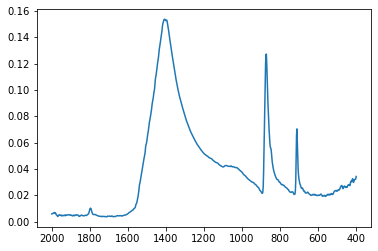

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


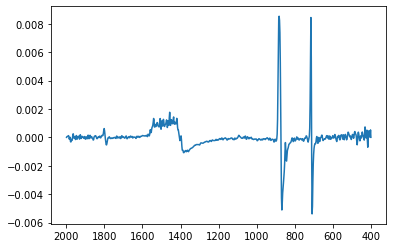

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00586         0.000000
970   1996.96986      0.00590         0.000049
971   1994.90900      0.00606         0.000058
972   1992.84815      0.00614         0.000070
973   1990.78729      0.00635         0.000092
...          ...          ...              ...
1741   408.04957      0.03203         0.000112
1742   405.98871      0.03197         0.000019
1743   403.92786      0.03211         0.000124
1744   401.86700      0.03248         0.000522
1745   399.80614      0.03426         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


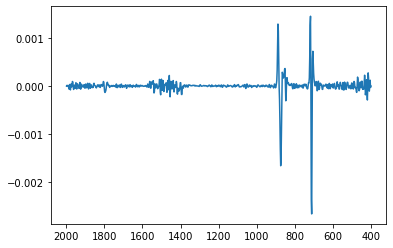

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00586         0.000000          0.000000
970   1996.96986      0.00590         0.000049          0.000014
971   1994.90900      0.00606         0.000058          0.000005
972   1992.84815      0.00614         0.000070          0.000008
973   1990.78729      0.00635         0.000092          0.000012
...          ...          ...              ...               ...
1741   408.04957      0.03203         0.000112         -0.000106
1742   405.98871      0.03197         0.000019          0.000003
1743   403.92786      0.03211         0.000124          0.000122
1744   401.86700      0.03248         0.000522         -0.000030
1745   399.80614      0.03426         0.000000          0.000000

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1256  1407.56493      0.15386         0.000082         -0.000099
1257  1405.50407  

In [128]:
data2_600_0=pd.read_table('Datos_Rotativo/2-600.0.txt',sep=',')
analiza(data2_600_0, False)

Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00444
970   1996.96986      0.00448
971   1994.90900      0.00477
972   1992.84815      0.00541
973   1990.78729      0.00626
...          ...          ...
1741   408.04957      0.05176
1742   405.98871      0.05158
1743   403.92786      0.05179
1744   401.86700      0.05399
1745   399.80614      0.05716

[777 rows x 2 columns]


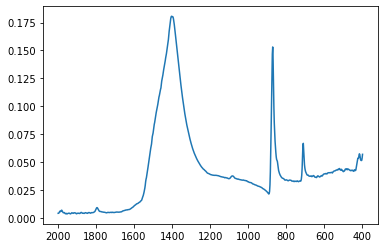

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


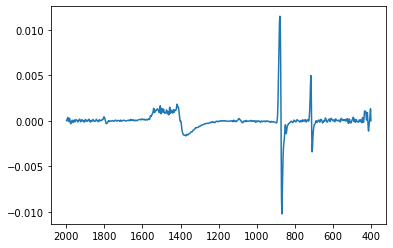

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00444         0.000000
970   1996.96986      0.00448         0.000080
971   1994.90900      0.00477         0.000226
972   1992.84815      0.00541         0.000362
973   1990.78729      0.00626         0.000218
...          ...          ...              ...
1741   408.04957      0.05176        -0.000177
1742   405.98871      0.05158         0.000007
1743   403.92786      0.05179         0.000585
1744   401.86700      0.05399         0.001303
1745   399.80614      0.05716         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


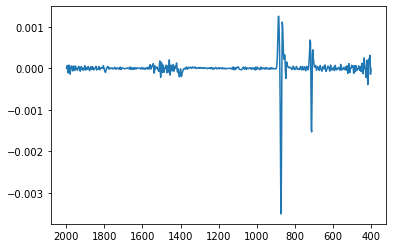

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00444         0.000000          0.000000
970   1996.96986      0.00448         0.000080          0.000055
971   1994.90900      0.00477         0.000226          0.000068
972   1992.84815      0.00541         0.000362         -0.000002
973   1990.78729      0.00626         0.000218         -0.000108
...          ...          ...              ...               ...
1741   408.04957      0.05176        -0.000177          0.000172
1742   405.98871      0.05158         0.000007          0.000185
1743   403.92786      0.05179         0.000585          0.000314
1744   401.86700      0.05399         0.001303         -0.000142
1745   399.80614      0.05716         0.000000          0.000000

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1258  1403.44321      0.18062         0.000087         -0.000145
1259  1401.38236  

In [129]:
data2_800_0=pd.read_table('Datos_Rotativo/2-800.0.txt',sep=',')
analiza(data2_800_0, False)

Holi estás en analiza
Output:
No. onda       float64
Absorbancia    float64
dtype: object
        No. onda  Absorbancia
969   1999.03072      0.00501
970   1996.96986      0.00456
971   1994.90900      0.00441
972   1992.84815      0.00489
973   1990.78729      0.00565
...          ...          ...
1741   408.04957      0.06900
1742   405.98871      0.06896
1743   403.92786      0.07063
1744   401.86700      0.07281
1745   399.80614      0.07530

[777 rows x 2 columns]


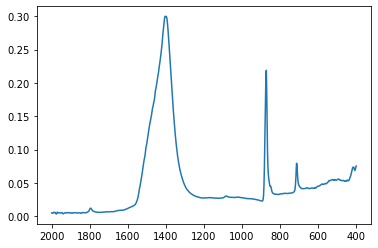

<Figure size 1800x1080 with 0 Axes>

~PRIMER DERIVADA~
Hello from derivative
1999.03072
776


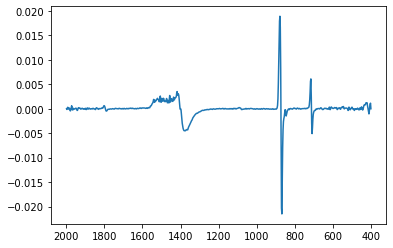

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada
969   1999.03072      0.00501         0.000000
970   1996.96986      0.00456        -0.000146
971   1994.90900      0.00441         0.000080
972   1992.84815      0.00489         0.000301
973   1990.78729      0.00565         0.000209
...          ...          ...              ...
1741   408.04957      0.06900        -0.000517
1742   405.98871      0.06896         0.000395
1743   403.92786      0.07063         0.000934
1744   401.86700      0.07281         0.001133
1745   399.80614      0.07530         0.000000

[777 rows x 3 columns]
~SEGUNDA DERIVADA~
Hello from derivative
1999.03072
776


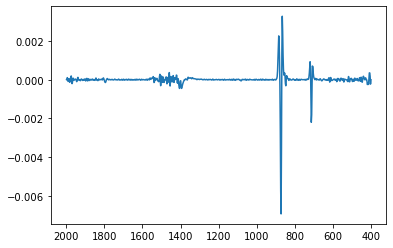

<Figure size 1800x1080 with 0 Axes>

        No. onda  Absorbancia  Primer derivada  Segunda derivada
969   1999.03072      0.00501         0.000000          0.000000
970   1996.96986      0.00456        -0.000146          0.000019
971   1994.90900      0.00441         0.000080          0.000108
972   1992.84815      0.00489         0.000301          0.000031
973   1990.78729      0.00565         0.000209         -0.000091
...          ...          ...              ...               ...
1741   408.04957      0.06900        -0.000517          0.000353
1742   405.98871      0.06896         0.000395          0.000352
1743   403.92786      0.07063         0.000934          0.000179
1744   401.86700      0.07281         0.001133         -0.000227
1745   399.80614      0.07530         0.000000          0.000000

[777 rows x 4 columns]
los valores más grandes que están en el pico n3         No. onda  Absorbancia  Primer derivada  Segunda derivada
1258  1403.44321      0.29991         0.000279         -0.000338
1259  1401.38236  

In [130]:
data2_1000_0=pd.read_table('Datos_Rotativo/2-1000.0.txt',sep=',')
analiza(data2_1000_0, False)